## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [37]:
import pandas as pd
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
data.head()
# using ISO-8859-1 for specific file importing

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


 - HANDLE MISSING VALUES

In [38]:
data.isnull().sum()
#check missing values

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [39]:
#dropping missing values
data.dropna(axis = 1, inplace= True)
data.isnull().sum()


ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

- CHECK FOR OUTLIERS

In [40]:
import numpy as np
numeric_columns = data.select_dtypes(include= [np.number]).columns
z_scores= np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())
z_scores

data = data[(z_scores < 3).all(axis = 1)]

## PART 2: Getting the inputs and output


In [41]:
# Drop the 'SALES' column
# Verify column names to ensure correct target variable
data_encode = pd.get_dummies(data, drop_first = True)
X = data_encode.drop(columns = 'SALES')
X

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,MSRP,ORDERDATE_1/10/2005 0:00,ORDERDATE_1/12/2004 0:00,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,1,2,2003,95,False,False,...,False,False,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2,5,2003,95,False,False,...,False,False,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3,7,2003,95,False,False,...,False,False,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3,8,2003,95,False,False,...,False,False,False,False,False,False,False,False,True,False
4,10159,49,100.00,14,4,10,2003,95,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,4,12,2004,54,False,False,...,False,False,False,False,False,False,False,False,False,True
2819,10373,29,100.00,1,1,1,2005,54,False,False,...,False,False,False,False,False,False,False,False,True,False
2820,10386,43,100.00,4,1,3,2005,54,False,False,...,False,False,False,False,False,False,False,False,True,False
2821,10397,34,62.24,1,1,3,2005,54,False,False,...,False,False,False,False,False,False,False,False,False,True


In [42]:
y = data_encode['SALES']
y
#sales as a independent variable

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2784, dtype: float64

### Creating the Training Set and the Test Set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [44]:
X_train

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,MSRP,ORDERDATE_1/10/2005 0:00,ORDERDATE_1/12/2004 0:00,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
1312,10383,28,58.58,7,1,2,2005,87,False,False,...,False,False,False,False,False,False,False,False,False,True
456,10204,42,100.00,17,4,12,2003,141,False,False,...,False,False,False,False,False,False,False,False,True,False
2006,10222,48,56.64,3,1,2,2004,68,False,False,...,True,False,False,False,False,False,False,False,False,True
1847,10148,31,73.62,5,3,9,2003,85,False,False,...,False,False,False,False,False,False,False,False,False,True
2691,10105,39,81.14,6,1,2,2003,100,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,10168,21,70.96,9,4,10,2003,84,False,False,...,False,False,False,False,False,False,False,False,False,True
858,10137,37,100.00,3,3,7,2003,132,False,False,...,False,False,False,False,False,False,False,False,True,False
1683,10299,33,66.49,6,3,9,2004,69,False,False,...,False,False,False,False,False,False,False,False,False,True
2645,10168,36,100.00,8,4,10,2003,118,False,False,...,False,False,False,False,False,False,False,False,True,False


In [45]:
X_test

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,MSRP,ORDERDATE_1/10/2005 0:00,ORDERDATE_1/12/2004 0:00,...,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Medium,DEALSIZE_Small
1459,10349,48,47.40,4,4,12,2004,57,False,False,...,False,False,False,False,False,False,False,False,False,True
584,10182,44,100.00,10,4,11,2003,170,False,False,...,True,False,False,False,False,False,False,False,False,False
113,10186,26,100.00,9,4,11,2003,136,False,False,...,False,False,False,False,False,False,False,False,True,False
2092,10333,39,100.00,1,4,11,2004,97,False,False,...,False,False,False,False,False,False,False,False,True,False
312,10363,34,96.73,4,1,1,2005,117,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,10185,39,100.00,16,4,11,2003,143,False,False,...,False,False,False,False,False,False,True,False,True,False
1787,10346,24,87.24,5,4,11,2004,117,False,False,...,False,False,False,False,False,False,False,False,False,True
1543,10162,37,27.22,5,4,10,2003,33,False,False,...,False,False,False,False,False,False,False,False,False,True
2341,10285,26,100.00,4,3,8,2004,102,False,False,...,False,False,False,False,False,False,False,False,False,True


In [46]:
y_train

1312    1640.24
456     6182.40
2006    2718.72
1847    2282.22
2691    3164.46
         ...   
785     1490.16
858     4346.76
1683    2194.17
2645    4527.72
2771    1348.76
Name: SALES, Length: 2227, dtype: float64

In [47]:
y_train

1312    1640.24
456     6182.40
2006    2718.72
1847    2282.22
2691    3164.46
         ...   
785     1490.16
858     4346.76
1683    2194.17
2645    4527.72
2771    1348.76
Name: SALES, Length: 2227, dtype: float64

## Part 2 - Building and training the model

### Building the model

In [48]:
from sklearn.preprocessing import StandardScaler

# Normalize if necessary
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


### Training the Model

In [49]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

### Inference

In [51]:
y_pred = model.predict(X_test)
y_pred

array([ 2248.82264912,  7601.86972577,  3894.99395363,  3726.17915455,
        4349.14418334,  4554.08371906,  1944.53110939,  4283.84330873,
        4015.05459015,  4305.77578489,  8498.29816971,  1338.89833833,
        5377.90103196,  1786.32175172,  2504.03917298,  3976.38556711,
        2374.47267446,  2520.69266158,  4111.70303179,  3915.93345814,
        6247.02860751,  5085.73700005,  4962.32478227,  3196.38817142,
         330.50255192,  2493.59909176,  7748.03783748,  4176.51068518,
        5075.62039822,  3679.98627484,  4218.22209046,  2523.78031487,
        4331.64154211,  3503.97768942,   929.5544038 ,  2548.27540454,
        4353.0699282 ,  4223.27136021,  2003.55561233,  2866.01516021,
        3682.00737084,  5133.9387801 ,  1560.59594335,  2725.91381674,
        1225.38583593,  1548.12749276,  8458.24761033,  7770.9334572 ,
        2628.54784288,  2375.02128493,  1897.50072848,  1732.03057931,
        4216.38187525,  4187.0904488 ,  1177.42110686,  4352.10205694,
      

In [52]:
y_test

1459    2275.20
584     7554.80
113     3854.24
2092    4424.16
312     3288.82
         ...   
1248    5096.91
1787    2093.76
1543    1007.14
2341    2600.26
506     2304.45
Name: SALES, Length: 557, dtype: float64

In [53]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.head(10)
# Higher coefficients indicate stronger relationships with the target variable (Sales)


,Coefficient
ORDERNUMBER,209.754189
QUANTITYORDERED,77.283274
PRICEEACH,45.670824
ORDERLINENUMBER,-0.437726
QTR_ID,26.198979
MONTH_ID,-2215.850382
YEAR_ID,-29665.247138
MSRP,5.017019
ORDERDATE_1/10/2005 0:00,992.123744
ORDERDATE_1/12/2004 0:00,556.901947


## Part 3: Evaluating the Model

### R-Squared

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8533945964636674

In [55]:
# Predict and calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 411775.9279674783


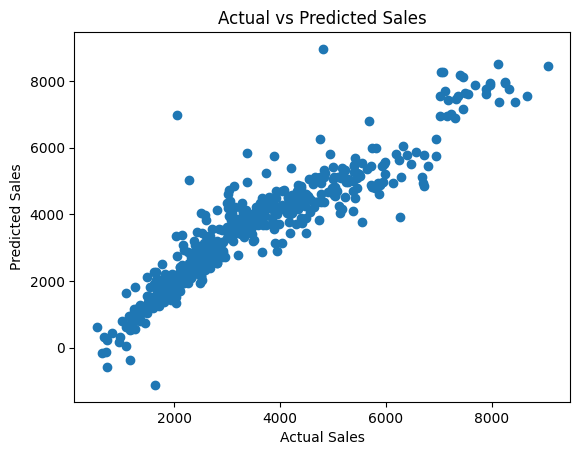

In [56]:
# Scatter plot to compare true vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
